In [1]:
import pandas as pd
import numpy as np

In [2]:
import seaborn as sns  
import matplotlib.pyplot as plt

# might be needed depending on your version of Jupyter
%matplotlib inline

In [3]:
df = pd.read_csv('../Production/Pandey_Ch07_Production_Engineering_Code/data/Well_Monthly_ProdN2.csv')

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 79392 entries, 0 to 79391
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   UWI         79392 non-null  object
 1   START_DATE  79392 non-null  object
 2   OIL         79392 non-null  int64 
 3   GAS         79392 non-null  int64 
 4   WATER       79392 non-null  int64 
dtypes: int64(3), object(2)
memory usage: 3.0+ MB


In [5]:
df.isnull().sum()

UWI           0
START_DATE    0
OIL           0
GAS           0
WATER         0
dtype: int64

In [6]:
df.head()

,UWI,START_DATE,OIL,GAS,WATER
0,BR819,1965-05-01,1785,0,0
1,AB257,1973-11-01,26550,22470,0
2,TR758,1973-11-01,122600,112100,0
3,ON369,1973-11-01,65134,36450,0
4,DS652,1973-11-01,61277,60180,0


In [11]:
df

,UWI,START_DATE,OIL,GAS,WATER
0,BR819,1965-05-01,1785,0,0
1,AB257,1973-11-01,26550,22470,0
2,TR758,1973-11-01,122600,112100,0
3,ON369,1973-11-01,65134,36450,0
4,DS652,1973-11-01,61277,60180,0
...,...,...,...,...,...
79387,RK103,2018-06-01,39467,44068,0
79388,TR855,2018-06-01,38581,44513,31049
79389,BR477,2018-06-01,5740,4052,434
79390,RK301,2018-06-01,0,0,0


In [12]:
df.corr()['OIL'].sort_values()

WATER   -0.077144
GAS      0.959902
OIL      1.000000
Name: OIL, dtype: float64

In [13]:
df.corr()['GAS'].sort_values()

WATER   -0.049226
OIL      0.959902
GAS      1.000000
Name: GAS, dtype: float64

In [14]:
df.corr()['WATER'].sort_values()

OIL     -0.077144
GAS     -0.049226
WATER    1.000000
Name: WATER, dtype: float64

In [15]:
df.corr()

,OIL,GAS,WATER
OIL,1.000000,0.959902,-0.077144
GAS,0.959902,1.000000,-0.049226
WATER,-0.077144,-0.049226,1.000000


In [16]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
OIL,79392.0,54148.439868,76041.654634,0.0,25465.5,38524.5,56588.00,991350.0
GAS,79392.0,41594.446052,64769.329977,0.0,16245.0,27790.0,43666.25,1163347.0
WATER,79392.0,3045.201129,8309.054854,0.0,0.0,106.0,1865.25,129218.0


In [17]:
from datetime import datetime
import statsmodels.api as sm

In [18]:
df['START_DATE']=pd.to_datetime(df['START_DATE'])

In [19]:
df

,UWI,START_DATE,OIL,GAS,WATER
0,BR819,1965-05-01,1785,0,0
1,AB257,1973-11-01,26550,22470,0
2,TR758,1973-11-01,122600,112100,0
3,ON369,1973-11-01,65134,36450,0
4,DS652,1973-11-01,61277,60180,0
...,...,...,...,...,...
79387,RK103,2018-06-01,39467,44068,0
79388,TR855,2018-06-01,38581,44513,31049
79389,BR477,2018-06-01,5740,4052,434
79390,RK301,2018-06-01,0,0,0


In [21]:
df['START_DATE']=df['START_DATE'].apply(pd.to_datetime)

In [22]:
df

,UWI,START_DATE,OIL,GAS,WATER
0,BR819,1965-05-01,1785,0,0
1,AB257,1973-11-01,26550,22470,0
2,TR758,1973-11-01,122600,112100,0
3,ON369,1973-11-01,65134,36450,0
4,DS652,1973-11-01,61277,60180,0
...,...,...,...,...,...
79387,RK103,2018-06-01,39467,44068,0
79388,TR855,2018-06-01,38581,44513,31049
79389,BR477,2018-06-01,5740,4052,434
79390,RK301,2018-06-01,0,0,0


In [23]:
df.set_index('START_DATE',inplace=True)

In [24]:
df = df.drop('WATER',axis=1)

In [25]:
df = df.drop('UWI',axis=1)

In [27]:
df = df.drop('GAS',axis=1)

In [28]:
df

,OIL
START_DATE,
1965-05-01,1785
1973-11-01,26550
1973-11-01,122600
1973-11-01,65134
1973-11-01,61277
...,...
2018-06-01,39467
2018-06-01,38581
2018-06-01,5740


In [29]:
df=df.replace(0, np.nan)

In [30]:
df=df.replace(0, np.nan).dropna(subset=["OIL"], how="all")

In [31]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 76311 entries, 1965-05-01 to 2018-06-01
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   OIL     76311 non-null  float64
dtypes: float64(1)
memory usage: 1.2 MB


In [32]:
result=sm.tsa.filters.hpfilter(df['OIL'])
result

(START_DATE
 1965-05-01   -40573.278209
 1973-11-01   -15346.564508
 1973-11-01    81190.507491
 1973-11-01    24271.887691
 1973-11-01    21006.781926
                   ...     
 2018-06-01     9308.261714
 2018-06-01    15022.202125
 2018-06-01     6905.856733
 2018-06-01     5960.440002
 2018-06-01   -26923.149760
 Name: OIL_cycle, Length: 76311, dtype: float64,
 START_DATE
 1965-05-01    42358.278209
 1973-11-01    41896.564508
 1973-11-01    41409.492509
 1973-11-01    40862.112309
 1973-11-01    40270.218074
                   ...     
 2018-06-01    32343.738286
 2018-06-01    32471.797875
 2018-06-01    32561.143267
 2018-06-01    32620.559998
 2018-06-01    32663.149760
 Name: OIL_trend, Length: 76311, dtype: float64)

In [33]:
result[0]

START_DATE
1965-05-01   -40573.278209
1973-11-01   -15346.564508
1973-11-01    81190.507491
1973-11-01    24271.887691
1973-11-01    21006.781926
                  ...     
2018-06-01     9308.261714
2018-06-01    15022.202125
2018-06-01     6905.856733
2018-06-01     5960.440002
2018-06-01   -26923.149760
Name: OIL_cycle, Length: 76311, dtype: float64

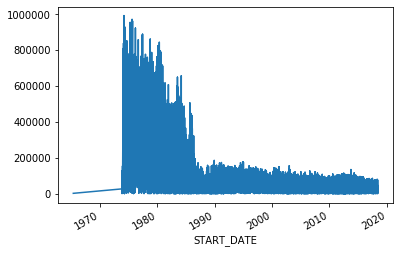

In [34]:
df['OIL'].plot();

In [35]:
OIL_REC, OIL_SIM=sm.tsa.filters.hpfilter(df['OIL'])

In [36]:
df['SIM']=OIL_SIM

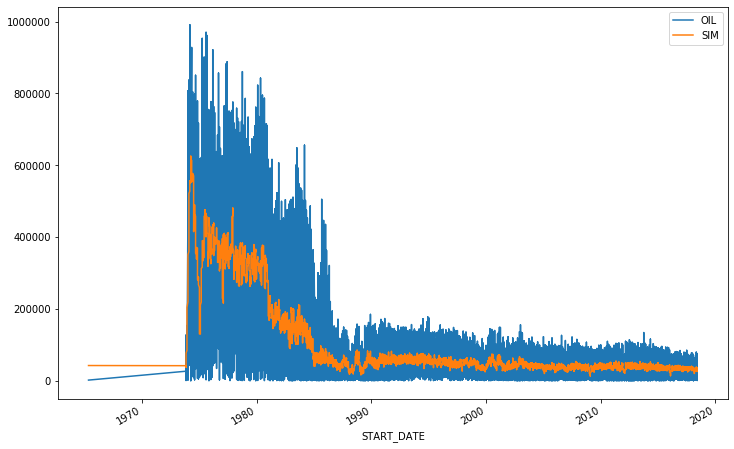

In [37]:
df[['OIL','SIM']].plot(figsize=(12,8));

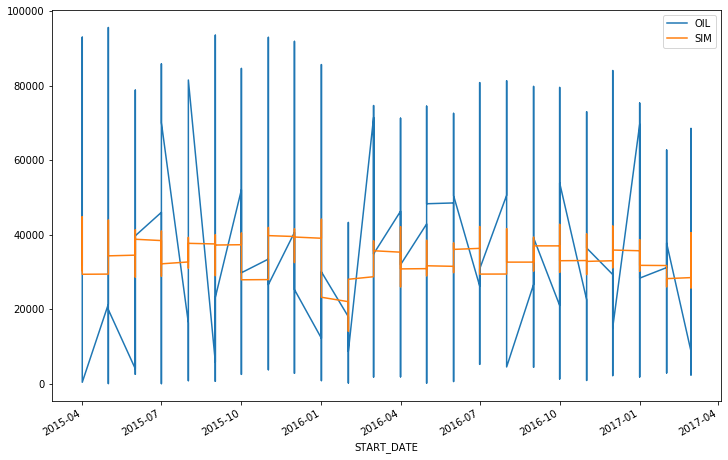

In [38]:
df[['OIL','SIM']]["2015-03-31":"2017-03-30"].plot(figsize=(12,8));

In [39]:
df['3-month-SMA']=df['OIL'].rolling(window=5).mean()

In [40]:
df['6-month-SMA']=df['OIL'].rolling(window=5).mean()

In [42]:
df['12-month-SMA']=df['OIL'].rolling(window=5).mean()

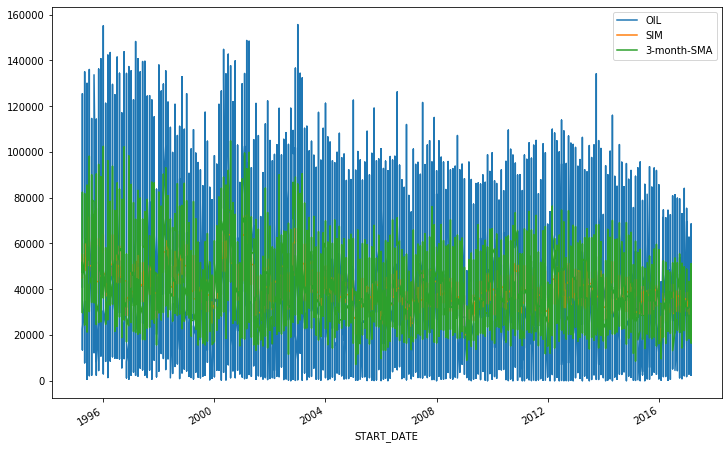

In [43]:
df[['OIL','SIM','3-month-SMA']]["1995.03.31":"2017.03.31"].plot(figsize=(12,8));

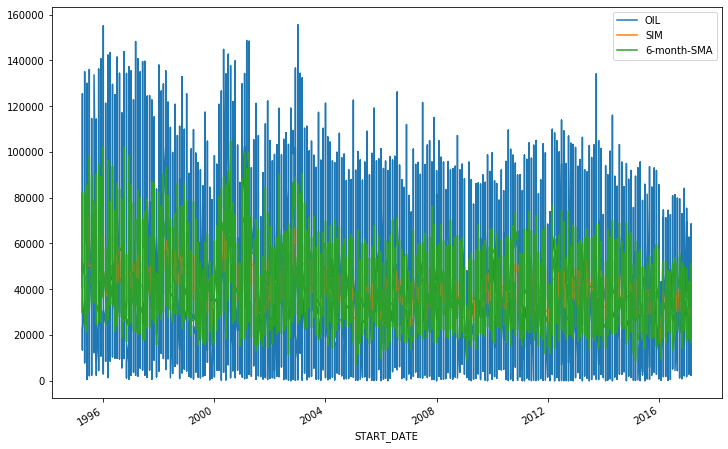

In [44]:
df[['OIL','SIM','6-month-SMA']]["1995.03.31":"2017.03.31"].plot(figsize=(12,8));

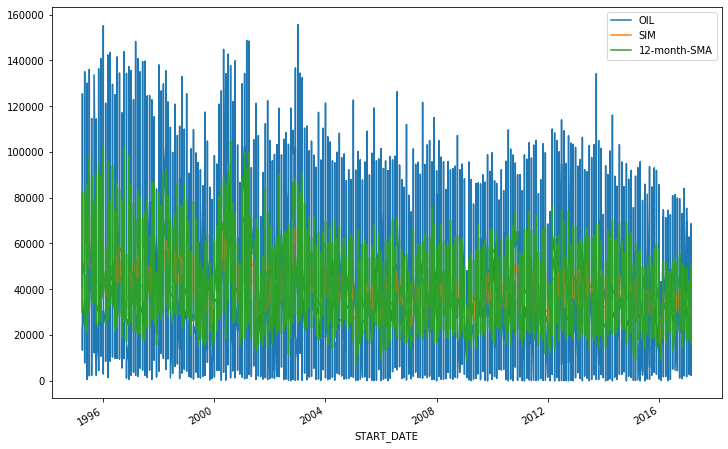

In [45]:
df[['OIL','SIM','12-month-SMA']]["1995.03.31":"2017.03.31"].plot(figsize=(12,8));

In [46]:
from statsmodels.tsa.seasonal import seasonal_decompose

In [47]:
df

,OIL,SIM,3-month-SMA,6-month-SMA,12-month-SMA
START_DATE,,,,,
1965-05-01,1785.0,42358.278209,NaN,NaN,NaN
1973-11-01,26550.0,41896.564508,NaN,NaN,NaN
1973-11-01,122600.0,41409.492509,NaN,NaN,NaN
1973-11-01,65134.0,40862.112309,NaN,NaN,NaN
1973-11-01,61277.0,40270.218074,55469.2,55469.2,55469.2
...,...,...,...,...,...
2018-06-01,41652.0,32343.738286,31328.0,31328.0,31328.0
2018-06-01,47494.0,32471.797875,34175.2,34175.2,34175.2
2018-06-01,39467.0,32561.143267,38565.0,38565.0,38565.0


In [50]:
#df = df.drop(['3-month-SMA','6-month-SMA','12-month-SMA'],axis=1)

In [51]:
#df

In [52]:
OilRate=df['OIL']
OilRate

START_DATE
1965-05-01      1785.0
1973-11-01     26550.0
1973-11-01    122600.0
1973-11-01     65134.0
1973-11-01     61277.0
                ...   
2018-06-01     41652.0
2018-06-01     47494.0
2018-06-01     39467.0
2018-06-01     38581.0
2018-06-01      5740.0
Name: OIL, Length: 76311, dtype: float64

/Users/tamerhousseinhag/opt/anaconda3/lib/python3.7/site-packages/IPython/core/pylabtools.py:132: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


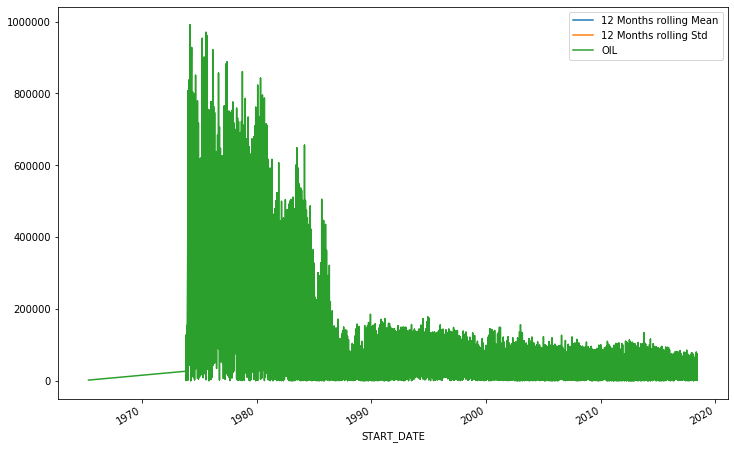

In [53]:
OilRate.rolling(12).mean().plot(label='12 Months rolling Mean')
OilRate.rolling(12).std().plot(label='12 Months rolling Std')
OilRate.plot(figsize=(12,8));
plt.legend();

In [54]:
from statsmodels.tsa.seasonal import seasonal_decompose

In [55]:
#decomp=seasonal_decompose(OilRate)
#figx=OilRate.plot()
#figx.set_size_inches(8,8)

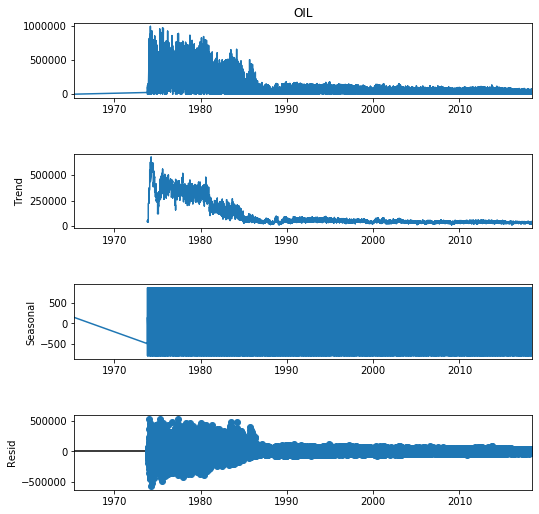

In [56]:
decomp=seasonal_decompose(OilRate,period=12)
figy=decomp.plot()
figy.set_size_inches(8,8)

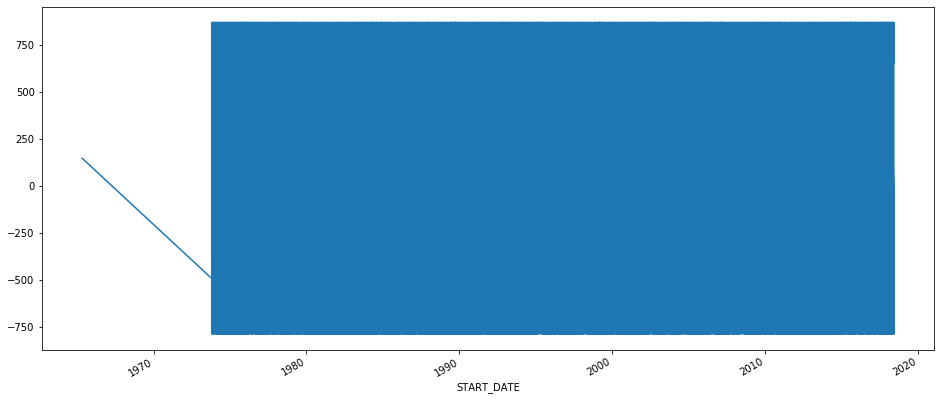

In [90]:
plt.figure(figsize = (16,7))
decomp.seasonal.plot()

In [57]:
from statsmodels.tsa.stattools import adfuller

In [58]:
result=adfuller(df['OIL'])

In [59]:
result

(-5.505336676949673,
 2.02785988625632e-06,
 64,
 76246,
 {'1%': -3.430435768698285,
  '5%': -2.8615779082907653,
  '10%': -2.5667901772793495},
 1861340.8156861432)

In [60]:
def adf_check(time_series):
    result=adfuller(time_series)
    print("Augmented Dicky-Fuller Test")
    labels=['ADF Test Statistic','p-value','nbr of lags','Nbr of used Observations']
    
    for value,label in zip(result,labels):
        print(label+ ":"+str(value))
    
    if result[1]<=0.05:
        print('Strong evidence against null hypothesis')
        print('Reject null hypothesis')
        print('Data has no unit root & is stationary')
    else:
        print('Weak evidence against null hypothesis')
        print('Fail to reject null hypothesis')
        print('Data has a unit root & is non-stationary')

In [61]:
adf_check(df['OIL'])

Augmented Dicky-Fuller Test
ADF Test Statistic:-5.505336676949673
p-value:2.02785988625632e-06
nbr of lags:64
Nbr of used Observations:76246
Strong evidence against null hypothesis
Reject null hypothesis
Data has no unit root & is stationary


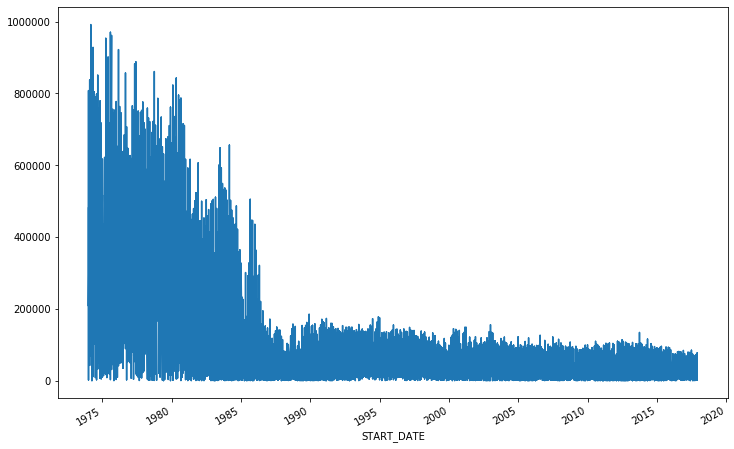

In [63]:
df['OIL']["1973-12-31":"2017-12-31"].plot(figsize=(12,8));

In [65]:
df['First Difference']=df['OIL']-df['OIL'].shift(1)
df['First Difference']

START_DATE
1965-05-01        NaN
1973-11-01    24765.0
1973-11-01    96050.0
1973-11-01   -57466.0
1973-11-01    -3857.0
               ...   
2018-06-01     4380.0
2018-06-01     5842.0
2018-06-01    -8027.0
2018-06-01     -886.0
2018-06-01   -32841.0
Name: First Difference, Length: 76311, dtype: float64

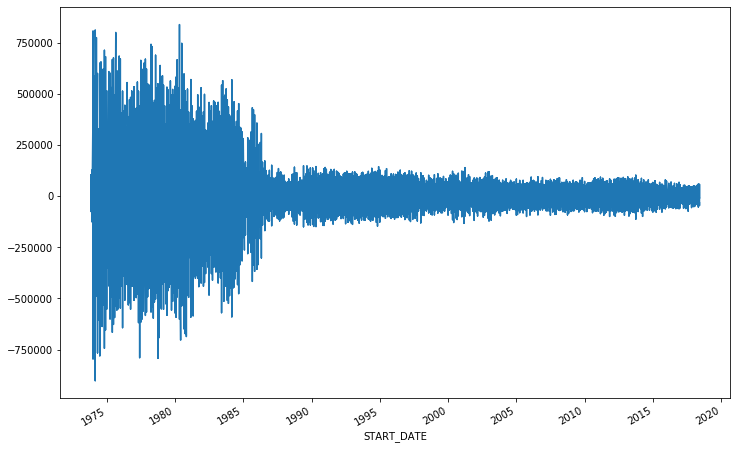

In [66]:
df['First Difference'][:"2020.12.31"].plot(figsize=(12,8));

In [67]:
adf_check(df['First Difference'].dropna())

Augmented Dicky-Fuller Test
ADF Test Statistic:-51.220774295037224
p-value:0.0
nbr of lags:64
Nbr of used Observations:76245
Strong evidence against null hypothesis
Reject null hypothesis
Data has no unit root & is stationary


In [68]:
df['Second Difference']=df['First Difference']-df['First Difference'].shift(1)

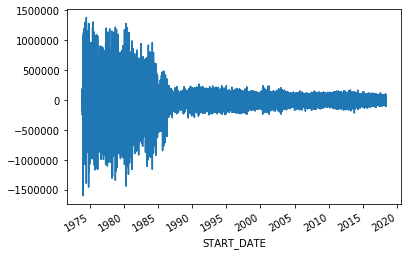

In [69]:
df['Second Difference'][:"2020.12.31"].plot();

In [70]:
adf_check(df['Second Difference'].dropna())

Augmented Dicky-Fuller Test
ADF Test Statistic:-75.58502279775135
p-value:0.0
nbr of lags:64
Nbr of used Observations:76244
Strong evidence against null hypothesis
Reject null hypothesis
Data has no unit root & is stationary


In [71]:
df['Seasonal Difference']=df['OIL']-df['OIL'].shift(12)

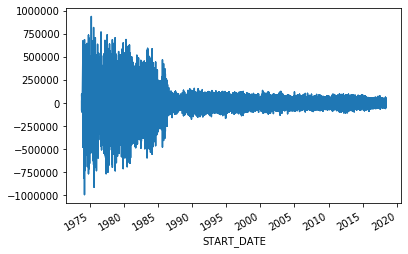

In [72]:
df['Seasonal Difference'][:"2020.12.31"].plot();

In [73]:
adf_check(df['Seasonal Difference'].dropna())

Augmented Dicky-Fuller Test
ADF Test Statistic:-47.54834281740124
p-value:0.0
nbr of lags:64
Nbr of used Observations:76234
Strong evidence against null hypothesis
Reject null hypothesis
Data has no unit root & is stationary


In [80]:
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf
from pandas.plotting import autocorrelation_plot
from statsmodels.tsa.statespace.sarimax import SARIMAX
from statsmodels.tsa.arima_model import ARIMA

In [81]:
model=sm.tsa.statespace.SARIMAX(df['OIL'],order=(2,1,1),seasonal_order=(1,1,1,12))

/Users/tamerhousseinhag/opt/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:218: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
/Users/tamerhousseinhag/opt/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:218: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)


In [82]:
results=model.fit()

In [83]:
results

In [84]:
print(results.summary())

                                     SARIMAX Results                                      
Dep. Variable:                                OIL   No. Observations:                76311
Model:             SARIMAX(2, 1, 1)x(1, 1, 1, 12)   Log Likelihood             -943800.970
Date:                            Sun, 03 Jan 2021   AIC                        1887613.941
Time:                                    19:50:27   BIC                        1887669.395
Sample:                                         0   HQIC                       1887630.977
                                          - 76311                                         
Covariance Type:                              opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.0227      0.003     -8.320      0.000      -0.028      -0.017
ar.L2         -0.0233      0.003   

In [85]:
#model=ARIMA(ts_log, order=(2, 1, 0))

In [86]:
df['forecast']=results.predict(start=2010,end=2020)
df[['OIL','forecast']].plot(figsize=(12,8));

ValueError: cannot reindex from a duplicate axis

In [87]:
from pandas.tseries.offsets import DateOffset

In [88]:
df['forecast']=results.predict(start=2009,end=2020)

ValueError: cannot reindex from a duplicate axis

KeyError: 'forecast'

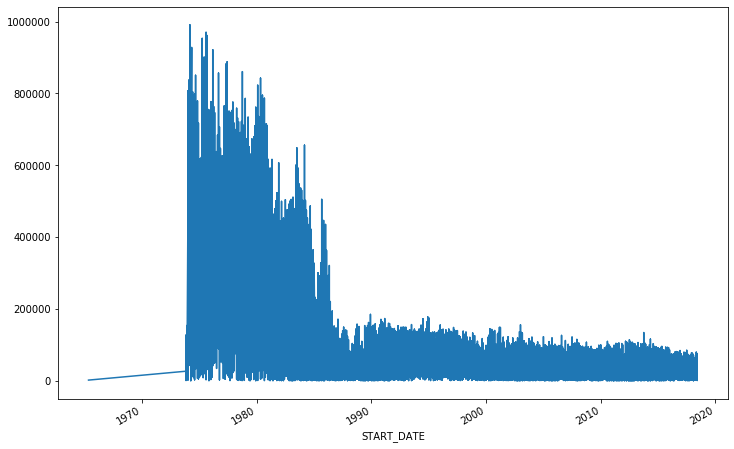

In [89]:
df['OIL'].plot(figsize=(12,8));
df['forecast'].plot(figsize=(12,8));